In [1]:
import numpy as np
import pandas as pd
import Thermobar as pt
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import warnings as w
pd.options.display.max_columns = None

In [2]:
plt.style.use("seaborn-colorblind")
plt.rcParams["font.family"] = 'arial'
plt.rcParams["font.size"] =9
plt.rcParams["mathtext.default"] = "regular"
plt.rcParams["mathtext.fontset"] = "dejavusans"
plt.rcParams['patch.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.major.size"] = 6 # Sets length of ticks
plt.rcParams["ytick.major.size"] = 4 # Sets length of ticks
plt.rcParams["ytick.labelsize"] = 8.5 # Sets size of numbers on tick marks
plt.rcParams["xtick.labelsize"] = 8.5 # Sets size of numbers on tick marks
plt.rcParams["axes.titlesize"] = 11 # Overall title
plt.rcParams["axes.labelsize"] = 11 # Axes labels

In [3]:
out=pt.import_excel(r'../LEPR_Wet_Stitched_April2023_NormtoTotal.xlsx', sheet_name='Cpx-Liq')
myCpxs1=out['Cpxs']
myLiquids1=out['Liqs']
cpx_Glass=out['my_input']
Cpx_Glass=cpx_Glass
notinLEPR= cpx_Glass['Citation_x'].str.contains('notinLEPR')
notinKeith=(cpx_Glass['Citation_x'].str.contains('Mercer, C.N., and Johnston, A.D. (2008)'))|(cpx_Glass['Citation_x'].str.contains('Alonso-Perez, R., Müntener, O., and Ulmer, P. (2009)'))
newMask=notinLEPR|notinKeith
OldMask=(~newMask)&(cpx_Glass['P_kbar_x']<15)
newMask=newMask.fillna(False)

mask_1GPa=cpx_Glass['P_kbar_x']<15
mask_1GPa=mask_1GPa.fillna(False)

Press_new=mask_1GPa&newMask
Press_new=Press_new.fillna(False)



C:\Users\penny\AppData\Local\Temp\ipykernel_26740\1610812147.py:7: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  notinKeith=(cpx_Glass['Citation_x'].str.contains('Mercer, C.N., and Johnston, A.D. (2008)'))|(cpx_Glass['Citation_x'].str.contains('Alonso-Perez, R., Müntener, O., and Ulmer, P. (2009)'))


In [14]:
cpx_Glass.loc[Blatter]

,Unnamed: 0,Experiment_x,Citation_x,SiO2_Cpx,TiO2_Cpx,TiO2_Cpx_Err,Al2O3_Cpx,Al2O3_Cpx_Err,FeOt_Cpx,MnO_Cpx,MgO_Cpx,CaO_Cpx,Na2O_Cpx,Na2O_Cpx_Err,K2O_Cpx,Cr2O3_Cpx,P2O5_Cpx,T_K_x,P_kbar_x,Duration_x,Laboratory_x,N_meas_Cpx,Total_Cpx,Experiment_long,Experiment_P_Name_x,Experiment_y,Citation_y,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,Total,T_K_y,P_kbar_y,Duration_y,Laboratory_y,H2O_Liq_Method,logfo2,N_meas_Liq,Total_Liq,DeltaNNO,Total_Test,N_meas_Glass,FeO_Liq,N_meas_Amp,Experiment_P_Name_y
521,521,2629,Blatter2017_notinLEPR,53.0,0.380,0.0,3.34,0.0,5.67,0.20,16.1,20.2,0.44,0.0,0.04,0.87,0.0,1348.15,7.0,0.0,USGS,11,100.2,Blatte2629,Blatte7.0,2629,Blatter2017_notinLEPR,65.6,0.59,16.2,3.392686,0.07,2.44,5.53,4.56,1.34,0.0,0.16,3.10,0.0,1348.15,7.0,0.0,USGS,AT_FTIR,0.0,29,96.8,0,0.0,0,0.0,0,Blatte7.0
522,522,2625,Blatter2017_notinLEPR,52.8,0.460,0.0,4.15,0.0,6.30,0.22,15.6,20.0,0.45,0.0,0.04,0.61,0.0,1323.15,7.0,0.0,USGS,21,100.7,Blatte2625,Blatte7.0,2625,Blatter2017_notinLEPR,66.3,0.52,16.1,3.477676,0.09,2.18,5.02,4.56,1.42,0.0,0.16,3.27,0.0,1323.15,7.0,0.0,USGS,AT_FTIR,0.0,26,97.1,0,0.0,0,0.0,0,Blatte7.0
530,530,2631,Blatter2017_notinLEPR,51.7,0.589,0.0,4.31,0.0,7.22,0.23,14.6,20.9,0.43,0.0,0.03,0.39,0.0,1223.15,7.0,0.0,USGS,10,100.4,Blatte2631,Blatte7.0,2631,Blatter2017_notinLEPR,66.2,0.54,17.2,3.348658,0.09,1.77,4.75,4.49,1.32,0.0,0.16,5.94,0.0,1223.15,7.0,0.0,USGS,AT_FTIR,0.0,29,93.8,0,0.0,0,0.0,0,Blatte7.0
531,531,2636,Blatter2017_notinLEPR,49.3,0.720,0.0,5.17,0.0,8.45,0.21,13.7,21.0,0.53,0.0,0.03,0.20,0.0,1198.15,7.0,0.0,USGS,8,99.3,Blatte2636,Blatte7.0,2636,Blatter2017_notinLEPR,68.4,0.40,16.7,2.806714,0.08,1.43,4.49,4.01,1.32,0.0,0.17,6.33,0.0,1198.15,7.0,0.0,USGS,AT_FTIR,0.0,28,94.9,0,0.0,0,0.0,0,Blatte7.0
532,532,2651,Blatter2017_notinLEPR,51.0,0.630,0.0,4.76,0.0,8.11,0.24,13.6,21.0,0.56,0.0,0.05,0.14,0.0,1173.15,7.0,0.0,USGS,15,100.1,Blatte2651,Blatte7.0,2651,Blatter2017_notinLEPR,69.0,0.38,16.5,2.488738,0.09,1.02,4.00,4.71,1.49,0.0,0.18,6.06,0.0,1173.15,7.0,0.0,USGS,AT_FTIR,0.0,28,93.4,0,0.0,0,0.0,0,Blatte7.0
537,537,2634,Blatter2017_notinLEPR,52.0,0.450,0.0,3.48,0.0,6.16,0.18,15.0,21.9,0.48,0.0,0.03,0.56,0.0,1223.15,7.0,0.0,USGS,10,100.2,Blatte2634,Blatte7.0,2634,Blatter2017_notinLEPR,65.9,0.54,17.0,3.283648,0.08,2.03,5.05,4.45,1.32,0.0,0.16,8.72,0.0,1223.15,7.0,0.0,USGS,AT_FTIR,0.0,27,89.0,0,0.0,0,0.0,0,Blatte7.0
538,538,2641,Blatter2017_notinLEPR,49.6,0.750,0.0,5.37,0.0,7.45,0.17,14.1,21.0,0.58,0.0,0.04,0.26,0.0,1173.15,7.0,0.0,USGS,6,99.3,Blatte2641,Blatte7.0,2641,Blatter2017_notinLEPR,67.1,0.47,17.3,2.823688,0.11,1.23,4.86,4.45,1.39,0.0,0.17,9.17,0.0,1173.15,7.0,0.0,USGS,AT_FTIR,0.0,26,88.6,0,0.0,0,0.0,0,Blatte7.0
539,539,2648,Blatter2017_notinLEPR,48.7,0.690,0.0,5.29,0.0,8.73,0.20,12.6,22.5,0.59,0.0,0.03,0.14,0.0,1148.15,7.0,0.0,USGS,8,99.5,Blatte2648,Blatte7.0,2648,Blatter2017_notinLEPR,67.9,0.35,17.6,2.272746,0.07,0.86,4.66,4.58,1.42,0.0,0.12,9.42,0.0,1148.15,7.0,0.0,USGS,AT_FTIR,0.0,29,91.9,0,0.0,0,0.0,0,Blatte7.0
540,540,2645,Blatter2017_notinLEPR,48.8,0.710,0.0,5.48,0.0,8.09,0.21,12.1,22.6,0.59,0.0,0.04,0.35,0.0,1123.15,7.0,0.0,USGS,8,98.9,Blatte2645,Blatte7.0,2645,Blatter2017_notinLEPR,68.8,0.29,17.5,1.930782,0.07,0.66,4.62,4.56,1.42,0.0,0.08,8.93,0.0,1123.15,7.0,0.0,USGS,AT_FTIR,0.0,28,91.7,0,0.0,0,0.0,0,Blatte7.0
541,541,2650,Blatter2017_notinLEPR,50.9,0.530,0.0,3.52,0.0,8.67,0.30,12.8,22.4,0.57,0.0,0.03,0.12,0.0,1073.15,7.0,0.0,USGS,9,99.9,Blatte2650,Blatte7.0,2650,Blatter2017_notinLEPR,72.8,0.27,15.5,1.285852,0.07,0.41,3.41,4.45,1.67,0.0,0.06,9.09,0.0,1073.15,7.0,0.0,USGS,AT_FTIR,0.0,29,90.0,0,0.0,0,0.0,0,Blatte7.0


In [15]:
Blatter=(cpx_Glass['Citation_x']=="Blatter2017_notinLEPR") &(cpx_Glass['P_kbar_x']==7)

In [16]:
sum(Blatter)

10

In [17]:
cpx_Glass['P_kbar_x'].loc[cpx_Glass['Citation_x']=="Blatter2017_notinLEPR"]

516    4.0
517    4.0
518    4.0
519    4.0
520    4.0
521    7.0
522    7.0
523    9.0
524    9.0
525    9.0
526    4.0
527    4.0
528    4.0
529    4.0
530    7.0
531    7.0
532    7.0
533    9.0
534    9.0
535    9.0
536    9.0
537    7.0
538    7.0
539    7.0
540    7.0
541    7.0
542    9.0
543    9.0
544    9.0
545    9.0
546    9.0
Name: P_kbar_x, dtype: float64

In [18]:
# Cpx_only_Blatter=pt.calculate_cpx_only_press_all_eqs(cpx_comps=myCpxs1.loc[Blatter].reset_index(drop=True), 
#                                              H2O_Liq=myLiquids1['H2O_Liq'].loc[Blatter].reset_index(drop=True))
Cpx_only_Blatter=pt.calculate_cpx_only_press_all_eqs(cpx_comps=myCpxs1.loc[Blatter], 
                                             H2O_Liq=myLiquids1['H2O_Liq'].loc[Blatter])


In [19]:
np.min(cpx_Glass['T_K_x'].loc[Blatter])-273.15

800.0000000000001

In [20]:
np.max(cpx_Glass['T_K_x'].loc[Blatter])-273.15

1075.0

In [21]:
myLiquids1.loc[Blatter]

,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,NiO_Liq,CoO_Liq,CO2_Liq,Sample_ID_Liq
521,65.6,0.59,16.2,3.392686,0.07,2.44,5.53,4.56,1.34,0.0,0.16,3.10,0.0,0.0,0.0,0.0,521
522,66.3,0.52,16.1,3.477676,0.09,2.18,5.02,4.56,1.42,0.0,0.16,3.27,0.0,0.0,0.0,0.0,522
530,66.2,0.54,17.2,3.348658,0.09,1.77,4.75,4.49,1.32,0.0,0.16,5.94,0.0,0.0,0.0,0.0,530
531,68.4,0.40,16.7,2.806714,0.08,1.43,4.49,4.01,1.32,0.0,0.17,6.33,0.0,0.0,0.0,0.0,531
532,69.0,0.38,16.5,2.488738,0.09,1.02,4.00,4.71,1.49,0.0,0.18,6.06,0.0,0.0,0.0,0.0,532
537,65.9,0.54,17.0,3.283648,0.08,2.03,5.05,4.45,1.32,0.0,0.16,8.72,0.0,0.0,0.0,0.0,537
538,67.1,0.47,17.3,2.823688,0.11,1.23,4.86,4.45,1.39,0.0,0.17,9.17,0.0,0.0,0.0,0.0,538
539,67.9,0.35,17.6,2.272746,0.07,0.86,4.66,4.58,1.42,0.0,0.12,9.42,0.0,0.0,0.0,0.0,539
540,68.8,0.29,17.5,1.930782,0.07,0.66,4.62,4.56,1.42,0.0,0.08,8.93,0.0,0.0,0.0,0.0,540
541,72.8,0.27,15.5,1.285852,0.07,0.41,3.41,4.45,1.67,0.0,0.06,9.09,0.0,0.0,0.0,0.0,541


In [22]:
P2008_eq33_eq32b=pt.calculate_cpx_liq_press_temp(cpx_comps=myCpxs1.loc[Blatter], 
                                             liq_comps=myLiquids1.loc[Blatter],
                                               equationP="P_Put2008_eq32b",
                                               equationT="T_Put2008_eq33",
                                               )

P2008_eq33_eq32a=pt.calculate_cpx_liq_press_temp(cpx_comps=myCpxs1.loc[Blatter], 
                                             liq_comps=myLiquids1.loc[Blatter],
                                               equationP="P_Put2008_eq32a",
                                               equationT="T_Put2008_eq33",
                                               )


P2008_eq32b_1999T2=pt.calculate_cpx_liq_press_temp(cpx_comps=myCpxs1.loc[Blatter], 
                                             liq_comps=myLiquids1.loc[Blatter],
                                               equationP="P_Put2008_eq32b",
                                               equationT="T_Put1996_eqT2",
                                               )

P2008_eq32a_2003=pt.calculate_cpx_liq_press_temp(cpx_comps=myCpxs1.loc[Blatter], 
                                             liq_comps=myLiquids1.loc[Blatter],
                                               equationP="P_Put2008_eq32a",
                                               equationT="T_Put2003",
                                               )

P2008_eq33_eq31=pt.calculate_cpx_liq_press_temp(cpx_comps=myCpxs1.loc[Blatter], 
                                             liq_comps=myLiquids1.loc[Blatter],
                                               equationP="P_Put2008_eq31",
                                               equationT="T_Put2008_eq33",
                                               )

P2008_eq33_eq30=pt.calculate_cpx_liq_press_temp(cpx_comps=myCpxs1.loc[Blatter], 
                                             liq_comps=myLiquids1.loc[Blatter],
                                               equationP="P_Put2008_eq30",
                                               equationT="T_Put2008_eq33",
                                               )

P2008_eq32d_eq32c=pt.calculate_cpx_liq_press_temp(cpx_comps=myCpxs1.loc[Blatter], 
                                             liq_comps=myLiquids1.loc[Blatter],
                                               equationP="P_Put2008_eq32c",
                                               equationT="T_Put2008_eq32d",
                                               )


P2008_eq33_eq32c=pt.calculate_cpx_liq_press_temp(cpx_comps=myCpxs1.loc[Blatter], 
                                             liq_comps=myLiquids1.loc[Blatter],
                                               equationP="P_Put2008_eq32c",
                                               equationT="T_Put2008_eq33",
                                               )



P2003_eq32c=pt.calculate_cpx_liq_press_temp(cpx_comps=myCpxs1.loc[Blatter], 
                                             liq_comps=myLiquids1.loc[Blatter],
                                               equationP="P_Put2008_eq32c",
                                               equationT="T_Put2003",
                                               )

P1996_T=pt.calculate_cpx_liq_press_temp(cpx_comps=myCpxs1.loc[Blatter], 
                                             liq_comps=myLiquids1.loc[Blatter],
                                               equationP="P_Put1996_eqP1",
                                               equationT="T_Put1996_eqT2",
                                               ).T_K_calc

P1996_eq32c=pt.calculate_cpx_liq_press(cpx_comps=myCpxs1.loc[Blatter], 
                                             liq_comps=myLiquids1.loc[Blatter],
                                               equationP="P_Put2008_eq32c",
                                               T=P1996_T
                                               )

P2008_eq33_NP=pt.calculate_cpx_liq_press_temp(cpx_comps=myCpxs1.loc[Blatter], 
                                             liq_comps=myLiquids1.loc[Blatter],
                                               equationP="P_Neave2017",
                                               equationT="T_Put2008_eq33",
                                               )

P2003=pt.calculate_cpx_liq_press_temp(cpx_comps=myCpxs1.loc[Blatter], 
                                             liq_comps=myLiquids1.loc[Blatter],
                                               equationP="P_Put2003",
                                               equationT="T_Put2003",
                                               )

P_Pet=pt.calculate_cpx_liq_press_temp(cpx_comps=myCpxs1.loc[Blatter], 
                                             liq_comps=myLiquids1.loc[Blatter],
                                               equationP="P_Petrelli2020_Cpx_Liq",
                                               equationT="T_Petrelli2020_Cpx_Liq",
                                               )

J_Jorg=pt.calculate_cpx_liq_press_temp(cpx_comps=myCpxs1.loc[Blatter], 
                                             liq_comps=myLiquids1.loc[Blatter],
                                               equationP="P_Jorgenson2022_Cpx_Liq",
                                               equationT="T_Jorgenson2022_Cpx_Liq",
                                               )


Youve selected a P-independent function
Youve selected a T-independent function
Youve selected a T-independent function
Im normalizing using the Jorgenson method, e.g. 100 total, 2dp
Im normalizing using the Jorgenson method, e.g. 100 total, 2dp
Youve selected a P-independent function
Youve selected a T-independent function
Youve selected a T-independent function


In [23]:
myLiquids1.loc[Blatter]

,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,NiO_Liq,CoO_Liq,CO2_Liq,Sample_ID_Liq
521,65.6,0.59,16.2,3.392686,0.07,2.44,5.53,4.56,1.34,0.0,0.16,3.10,0.0,0.0,0.0,0.0,521
522,66.3,0.52,16.1,3.477676,0.09,2.18,5.02,4.56,1.42,0.0,0.16,3.27,0.0,0.0,0.0,0.0,522
530,66.2,0.54,17.2,3.348658,0.09,1.77,4.75,4.49,1.32,0.0,0.16,5.94,0.0,0.0,0.0,0.0,530
531,68.4,0.40,16.7,2.806714,0.08,1.43,4.49,4.01,1.32,0.0,0.17,6.33,0.0,0.0,0.0,0.0,531
532,69.0,0.38,16.5,2.488738,0.09,1.02,4.00,4.71,1.49,0.0,0.18,6.06,0.0,0.0,0.0,0.0,532
537,65.9,0.54,17.0,3.283648,0.08,2.03,5.05,4.45,1.32,0.0,0.16,8.72,0.0,0.0,0.0,0.0,537
538,67.1,0.47,17.3,2.823688,0.11,1.23,4.86,4.45,1.39,0.0,0.17,9.17,0.0,0.0,0.0,0.0,538
539,67.9,0.35,17.6,2.272746,0.07,0.86,4.66,4.58,1.42,0.0,0.12,9.42,0.0,0.0,0.0,0.0,539
540,68.8,0.29,17.5,1.930782,0.07,0.66,4.62,4.56,1.42,0.0,0.08,8.93,0.0,0.0,0.0,0.0,540
541,72.8,0.27,15.5,1.285852,0.07,0.41,3.41,4.45,1.67,0.0,0.06,9.09,0.0,0.0,0.0,0.0,541


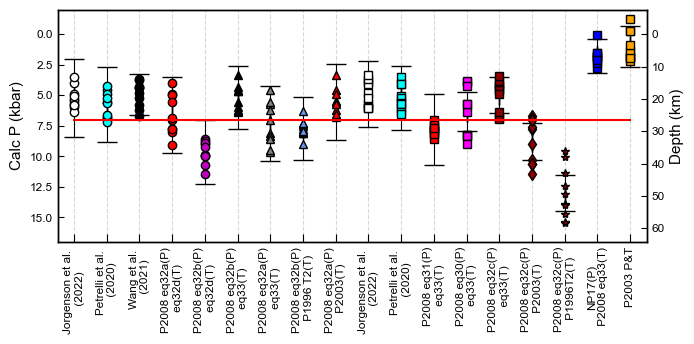

In [27]:
fig, (ax1) = plt.subplots(1, 1, figsize=(7.6,4))
ms1=6
err=0



ax1.errorbar(np.mean(cpx_Glass['P_kbar_x'].loc[Blatter])*0+0+err, 
             np.mean(Cpx_only_Blatter['P_Jorgenson22']), 
             yerr=3.2 , xerr=0, fmt='.k', ecolor='k', 
             elinewidth=0.8, mfc='white', ms=0, mec='k', capsize=7)
ax1.plot(cpx_Glass['P_kbar_x'].loc[Blatter]*0, Cpx_only_Blatter['P_Jorgenson22'], 'ok',  mfc='white', ms=ms1, label='Petrelli20')
    
    
# Cpx-only expressions
ax1.errorbar(np.mean(cpx_Glass['P_kbar_x'].loc[Blatter])*0+1+err, 
             np.mean(Cpx_only_Blatter['P_Petrelli20']), 
             yerr=3.1 , xerr=0, fmt='.k', ecolor='k', 
             elinewidth=0.8, mfc='cyan', ms=0, mec='k', capsize=7)
ax1.plot(cpx_Glass['P_kbar_x'].loc[Blatter]*0+1, Cpx_only_Blatter['P_Petrelli20'], 'ok',  mfc='cyan', ms=ms1, label='Petrelli20')

ax1.errorbar(np.mean(cpx_Glass['P_kbar_x'].loc[Blatter])*0+2+err, 
             np.mean(Cpx_only_Blatter['P_Wang21_eq1']), 
             yerr=1.66 , xerr=0, fmt='.k',
             ecolor='k', elinewidth=0.8, mfc='cyan', ms=0, mec='k', capsize=7)
ax1.plot(cpx_Glass['P_kbar_x'].loc[Blatter]*0+2, Cpx_only_Blatter['P_Wang21_eq1'], 'ok', ms=ms1,
         mfc='k', label='Wang et al. (2021)')

ax1.errorbar(np.mean(cpx_Glass['P_kbar_x'].loc[Blatter])*0+3+err, 
             np.mean(Cpx_only_Blatter['P_Put_Teq32d_Peq32a']), 
             yerr=3.1 , xerr=0, fmt='.k', ecolor='k', 
             elinewidth=0.8, mfc='cyan', ms=0, mec='k', capsize=7)
ax1.plot(cpx_Glass['P_kbar_x'].loc[Blatter]*0+3, Cpx_only_Blatter['P_Put_Teq32d_Peq32a'], 'ok', ms=ms1,
         mfc='r', label='Putirka (2008) eq32d-32a')

ax1.errorbar(np.mean(cpx_Glass['P_kbar_x'].loc[Blatter])*0+4+err, 
             np.mean(Cpx_only_Blatter['P_Put_Teq32d_Peq32b']), 
             yerr=2.6 , xerr=0, fmt='.k', ecolor='k', 
             elinewidth=0.8, mfc='cyan', ms=0, mec='k', capsize=7)
ax1.plot(cpx_Glass['P_kbar_x'].loc[Blatter]*0+4, Cpx_only_Blatter['P_Put_Teq32d_Peq32b'], 'ok', ms=ms1,
         mfc='m', label='Putirka (2008) eq32d-32b')



ax1.errorbar(np.mean(cpx_Glass['P_kbar_x'].loc[Blatter])*0+5+err, 
             np.mean(P2008_eq33_eq32b['P_kbar_calc']), 
             yerr=2.6 , xerr=0, fmt='.k', ecolor='k', 
             elinewidth=0.8, mfc='cyan', ms=0, mec='k', capsize=7)
ax1.plot(cpx_Glass['P_kbar_x'].loc[Blatter]*0+5, P2008_eq33_eq32b['P_kbar_calc'],  '^k', ms=ms1)

ax1.errorbar(np.mean(cpx_Glass['P_kbar_x'].loc[Blatter])*0+6+err, 
             np.mean(P2008_eq33_eq32a['P_kbar_calc']), 
             yerr=3.1 , xerr=0, fmt='.k', ecolor='k', 
             elinewidth=0.8, mfc='cyan', ms=0, mec='k', capsize=7)
ax1.plot(cpx_Glass['P_kbar_x'].loc[Blatter]*0+6, P2008_eq33_eq32a['P_kbar_calc'], '^k', ms=ms1,
          mfc='grey')

ax1.errorbar(np.mean(cpx_Glass['P_kbar_x'].loc[Blatter])*0+7+err, 
             np.mean(P2008_eq32b_1999T2['P_kbar_calc']), 
             yerr=2.6 , xerr=0, fmt='.k', ecolor='k', 
             elinewidth=0.8, mfc='cyan', ms=0, mec='k', capsize=7)
ax1.plot(cpx_Glass['P_kbar_x'].loc[Blatter]*0+7, P2008_eq32b_1999T2['P_kbar_calc'], '^k',ms=ms1,
          mfc='cornflowerblue')

ax1.errorbar(np.mean(cpx_Glass['P_kbar_x'].loc[Blatter])*0+8+err, 
             np.mean(P2008_eq32a_2003['P_kbar_calc']), 
             yerr=3.1 , xerr=0, fmt='.k', ecolor='k', 
             elinewidth=0.8, mfc='cyan', ms=0, mec='k', capsize=7)
ax1.plot(cpx_Glass['P_kbar_x'].loc[Blatter]*0+8, P2008_eq32a_2003['P_kbar_calc'],'^k', ms=ms1,
          mfc='red')





# Switching to Cpx-Liq pressures #############################33
#######################################################33
offset=10

ax1.errorbar(np.mean(cpx_Glass['P_kbar_x'].loc[Blatter])*0+err+offset-1, 
             np.mean(J_Jorg['P_kbar_calc']), 
             yerr=2.7, xerr=0, fmt='.k', ecolor='k', 
             elinewidth=0.8, mfc='white', ms=0, mec='k', capsize=7)
ax1.plot(cpx_Glass['P_kbar_x'].loc[Blatter]*0+offset-1, J_Jorg['P_kbar_calc'], 
         'sk', ms=ms1,
         mfc='white')

ax1.errorbar(np.mean(cpx_Glass['P_kbar_x'].loc[Blatter])*0+err+offset, 
             np.mean(P_Pet['P_kbar_calc']), 
             yerr=2.6, xerr=0, fmt='.k', ecolor='k', 
             elinewidth=0.8, mfc='cyan', ms=0, mec='k', capsize=7)
ax1.plot(cpx_Glass['P_kbar_x'].loc[Blatter]*0+offset, P_Pet['P_kbar_calc'], 
         'sk', ms=ms1,
         mfc='cyan')


ax1.errorbar(np.mean(cpx_Glass['P_kbar_x'].loc[Blatter])*0+1+err+offset, 
             np.mean(P2008_eq33_eq31['P_kbar_calc']), 
             yerr=2.9 , xerr=0, fmt='.k', ecolor='k', 
             elinewidth=0.8, mfc='cyan', ms=0, mec='k', capsize=7)
ax1.plot(cpx_Glass['P_kbar_x'].loc[Blatter]*0+1+offset, P2008_eq33_eq31['P_kbar_calc'], 'sk', ms=ms1,
         mfc='red', label='eq33-eq30')

ax1.errorbar(np.mean(cpx_Glass['P_kbar_x'].loc[Blatter])*0+2+err+offset, 
             np.mean(P2008_eq33_eq30['P_kbar_calc']), 
             yerr=1.6 , xerr=0, fmt='.k', ecolor='k',
             elinewidth=0.8, mfc='cyan', ms=0, mec='k', capsize=7)
ax1.plot(cpx_Glass['P_kbar_x'].loc[Blatter]*0+2+offset, P2008_eq33_eq30['P_kbar_calc'], 'sk', ms=ms1,
         mfc='magenta', label='eq33-eq30')
## All 32 C ones. 
ax1.errorbar(np.mean(cpx_Glass['P_kbar_x'].loc[Blatter])*0+3+err+offset, 
             np.mean(P2008_eq33_eq32c['P_kbar_calc']), 
             yerr=1.5, xerr=0, fmt='.k', ecolor='k',
             elinewidth=0.8, mfc='cyan', ms=0, mec='k', capsize=7)
ax1.plot(cpx_Glass['P_kbar_x'].loc[Blatter]*0+3+offset, P2008_eq33_eq32c['P_kbar_calc'], 'sk', ms=ms1,
         mfc='darkred', label='eq33-eq30')


ax1.errorbar(np.mean(cpx_Glass['P_kbar_x'].loc[Blatter])*0+4+err+offset, 
             np.mean(P2003_eq32c['P_kbar_calc']), 
             yerr=1.5, xerr=0, fmt='.k', ecolor='k',
             elinewidth=0.8, mfc='cyan', ms=0, mec='k', capsize=7)
ax1.plot(cpx_Glass['P_kbar_x'].loc[Blatter]*0+4+offset, P2003_eq32c['P_kbar_calc'], 'dk', ms=ms1,
         mfc='darkred', label='eq33-eq30')

ax1.errorbar(np.mean(cpx_Glass['P_kbar_x'].loc[Blatter])*0+5+err+offset, 
             np.mean(P1996_eq32c), 
             yerr=1.5, xerr=0, fmt='.k', ecolor='k', 
             elinewidth=0.8, mfc='cyan', ms=0, mec='k', capsize=7)
ax1.plot(cpx_Glass['P_kbar_x'].loc[Blatter]*0+5+offset, P1996_eq32c, '*k', ms=ms1,
         mfc='darkred', label='eq33-eq30')

ax1.errorbar(np.mean(cpx_Glass['P_kbar_x'].loc[Blatter])*0+6+err+offset, 
             np.mean(P2008_eq33_NP['P_kbar_calc']), 
             yerr=1.4, xerr=0, fmt='.k', ecolor='k', 
             elinewidth=0.8, mfc='cyan', ms=0, mec='k', capsize=7)
ax1.plot(cpx_Glass['P_kbar_x'].loc[Blatter]*0+6+offset, P2008_eq33_NP['P_kbar_calc'], 'sk', ms=ms1,
         mfc='blue', label='eq33-eq30')

ax1.errorbar(np.mean(cpx_Glass['P_kbar_x'].loc[Blatter])*0+7+err+offset, 
             np.mean(P2003['P_kbar_calc']), 
             yerr=1.7, xerr=0, fmt='.k', ecolor='k',
             elinewidth=0.8, mfc='cyan', ms=0, mec='k', capsize=7)
ax1.plot(cpx_Glass['P_kbar_x'].loc[Blatter]*0+7+offset, P2003['P_kbar_calc'], 'sk', ms=ms1,
         mfc='orange', label='eq33-eq30')



ticks = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
# labels = ["Petrelli et al. (2020)", "Wang et al. (2021)", "P2008 eq32a(P)-eq32d(T)", "P2008 eq32b(P)-eq32d(T)", 
#          "P2008 eq32b(P)-eq33(T)", "P2008 eq32a(P)-eq33(T)", "P2008 eq32b(P)-P1996 T2(T)", "P2008 eq32a(P)-P2003(T)"]
labels = ["Jorgenson et al. \n (2022)", "Petrelli et al. \n (2020)", "Wang et al. \n (2021)", "P2008 eq32a(P)\n eq32d(T)", "P2008 eq32b(P)\n eq32d(T)", 
         "P2008 eq32b(P)\n eq33(T)", "P2008 eq32a(P)\n eq33(T)", "P2008 eq32b(P)\n P1996 T2(T)", "P2008 eq32a(P)\n P2003(T)",
         "Jorgenson et al. \n (2022)",
         "Petrelli et al. \n (2020)", "P2008 eq31(P)\n eq33(T)", "P2008 eq30(P)\n eq33(T)", "P2008 eq32c(P)\n  eq33(T)",
         "P2008 eq32c(P)\n P2003(T)", "P2008 eq32c(P)\n P1996T2(T)", "NP17(P)\n P2008 eq33(T)", "P2003 P&T"]



ax1.set_xticks(ticks, minor=False)
ax1.set_xticklabels(labels, fontdict=None, minor=False, rotation=90)
ax1.set_xlim([-0.5, 17.5])
#ax1.grid(color = 'k', linestyle = '--', linewidth = 1, alpha = 0.1)
ax1.xaxis.grid(linestyle = '--', alpha=0.5)

ax1.plot([0, 17], [7, 7], '-r')




import matplotlib.patches as patches


## Set up second axis. 
MinP1=-2
MaxP1=17
MaxP2=17
MaxD1=pt.convert_pressure_to_depth(P_kbar=MaxP1, 
                                    crust_dens_kgm3=2700, g=9.81)
MinD1=pt.convert_pressure_to_depth(P_kbar=MinP1, 
                                    crust_dens_kgm3=2700, g=9.81)
ax1.set_ylim([MaxP1, MinP1])
ax1b=ax1.twinx()
ax1b.set_ylim([MaxD1[0], MinD1[0]])


ax1.set_ylabel('Calc P (kbar)')
ax1b.set_ylabel('Depth (km)')



plt.subplots_adjust(bottom=0.3, wspace=0.4)
fig.savefig('Blatter17_7kbar_Exp_Comparison.png', dpi=300, bbox_inches='tight')
